# Assignment-09-Association Rules Data Mining (Groceries)

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Import Dataset
col_names = ['pur1','pur2','pur3','pur4','pur5','pur6','pur7','pur8','pur9','pur10','pur11','pur12','pur13','pur14','pur15','pur16','pur17','pur18','pur19','pur20','pur21','pur22','pur23','pur24','pur25','pur26','pur27','pur28','pur29','pur30','pur31','pur32']
groc=pd.read_csv('Database/groceries.csv', names=col_names)
groc

,pur1,pur2,pur3,pur4,pur5,pur6,pur7,pur8,pur9,pur10,...,pur23,pur24,pur25,pur26,pur27,pur28,pur29,pur30,pur31,pur32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
groc.shape

(9835, 32)

In [4]:
groc.dtypes

pur1     object
pur2     object
pur3     object
pur4     object
pur5     object
pur6     object
pur7     object
pur8     object
pur9     object
pur10    object
pur11    object
pur12    object
pur13    object
pur14    object
pur15    object
pur16    object
pur17    object
pur18    object
pur19    object
pur20    object
pur21    object
pur22    object
pur23    object
pur24    object
pur25    object
pur26    object
pur27    object
pur28    object
pur29    object
pur30    object
pur31    object
pur32    object
dtype: object

In [5]:
#Converting the data frame into a list of lists 
records = []
for i in range (0, 9835):
    records.append([str(groc.values[i,j]) for j in range(0, 32)])

In [6]:
records

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pip fruit',
  'yogurt',
  'cream cheese ',
  'meat spreads',
  'nan

In [7]:
# Using Transactionencoder to transform this dataset into a logical data frame
te=TransactionEncoder()

In [8]:
te_ary=te.fit_transform(records)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
# building the data frame rows are logical and columns are the items have been purchased 
te_df = pd.DataFrame(te_ary, columns = te.columns_)
te_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Print Column names
for col in te_df.columns:
    print(col)

Instant food products
UHT-milk
abrasive cleaner
artif. sweetener
baby cosmetics
baby food
bags
baking powder
bathroom cleaner
beef
berries
beverages
bottled beer
bottled water
brandy
brown bread
butter
butter milk
cake bar
candles
candy
canned beer
canned fish
canned fruit
canned vegetables
cat food
cereals
chewing gum
chicken
chocolate
chocolate marshmallow
citrus fruit
cleaner
cling film/bags
cocoa drinks
coffee
condensed milk
cooking chocolate
cookware
cream
cream cheese 
curd
curd cheese
decalcifier
dental care
dessert
detergent
dish cleaner
dishes
dog food
domestic eggs
female sanitary products
finished products
fish
flour
flower (seeds)
flower soil/fertilizer
frankfurter
frozen chicken
frozen dessert
frozen fish
frozen fruits
frozen meals
frozen potato products
frozen vegetables
fruit/vegetable juice
grapes
hair spray
ham
hamburger meat
hard cheese
herbs
honey
house keeping products
hygiene articles
ice cream
instant coffee
jam
ketchup
kitchen towels
kitchen utensil
light bulbs
l

In [11]:
# We need to drop nan column from the data frame
groc_clean = te_df.drop(['nan'], axis = 1)
groc_clean

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# most popular items
count = groc_clean.loc[:,:].sum()
count

Instant food products      79
UHT-milk                  329
abrasive cleaner           35
artif. sweetener           32
baby cosmetics              6
                         ... 
white bread               414
white wine                187
whole milk               2513
yogurt                   1372
zwieback                   68
Length: 169, dtype: int64

In [13]:
# Top 10 Popular items
pop_item = count.sort_values(0, ascending = False).head(10)
pop_item

whole milk          2513
other vegetables    1903
rolls/buns          1809
soda                1715
yogurt              1372
bottled water       1087
root vegetables     1072
tropical fruit      1032
shopping bags        969
sausage              924
dtype: int64

In [14]:
pop_item = pop_item.to_frame().reset_index()
pop_item

,index,0
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


In [15]:
pop_item = pop_item.rename(columns = {'index': 'items',0: 'count'})
pop_item

,items,count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


C:\Users\Hitesh Koli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


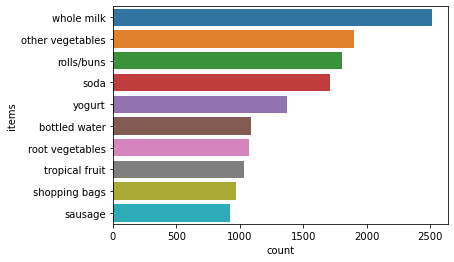

In [16]:
sns.barplot('count','items',data=pop_item)

## Apriori Algorithm

### 1. Association rules with 5% Support and 70% confidence

In [17]:
# With 5% Support
frequent_itemsets=apriori(groc_clean,min_support=0.05,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [18]:
# with 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


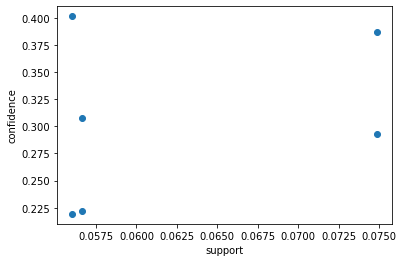

In [19]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### 2. Association rules with 1% Support and 80% confidence

In [20]:
# With 1% Support
frequent_itemsets2=apriori(groc_clean,min_support=0.01,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(tropical fruit, root vegetables, whole milk)"
329,0.014540,"(root vegetables, whole milk, yogurt)"
330,0.010473,"(soda, whole milk, yogurt)"
331,0.015150,"(tropical fruit, whole milk, yogurt)"


In [21]:
# with 80% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
3,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
4,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
...,...,...,...,...,...,...,...,...,...
611,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
612,"(whole milk, yogurt)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033
613,(whipped/sour cream),"(whole milk, yogurt)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881
614,(whole milk),"(whipped/sour cream, yogurt)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807


In [22]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
3,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
4,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
...,...,...,...,...,...,...,...,...,...
611,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
612,"(whole milk, yogurt)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033
613,(whipped/sour cream),"(whole milk, yogurt)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881
614,(whole milk),"(whipped/sour cream, yogurt)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807


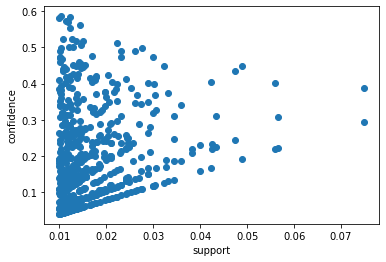

In [23]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()